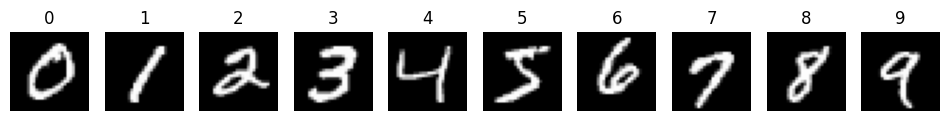

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist


(train_X, train_y), _ = mnist.load_data()
num_digits = 10

representative_images = [train_X[train_y == i][0] for i in range(num_digits)]
representative_labels = [i for i in range(num_digits)]

plt.figure(figsize=(12, 4))
for i, img in enumerate(representative_images):
    plt.subplot(1, num_digits, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(representative_labels[i])
    plt.axis('off')
plt.show()





In [ ]:
def preprocess(image):
    return np.where(image.flatten() / 255.0 > 0.5, 1, -1)

def calculate_weights(patterns):
    N = patterns[0].shape[0]
    W = np.zeros((N, N))
    for p in patterns:
        W += np.outer(p, p)
    np.fill_diagonal(W, 0)
    return W

def add_noise(pattern, noise_level=0.2):
    noisy = pattern.copy()
    num_flip = int(len(pattern) * noise_level)
    flip_indices = np.random.choice(len(pattern), size=num_flip, replace=False)
    noisy[flip_indices] *= -1
    return noisy

def hopfield_recall_async(weights, input_pattern, steps=500):
    state = input_pattern.copy()
    N = len(state)
    for _ in range(steps):
        i = np.random.randint(0, N)
        net_input = np.dot(weights[i], state)
        state[i] = 1 if net_input >= 0 else -1
    return state

Predicted digit: 7


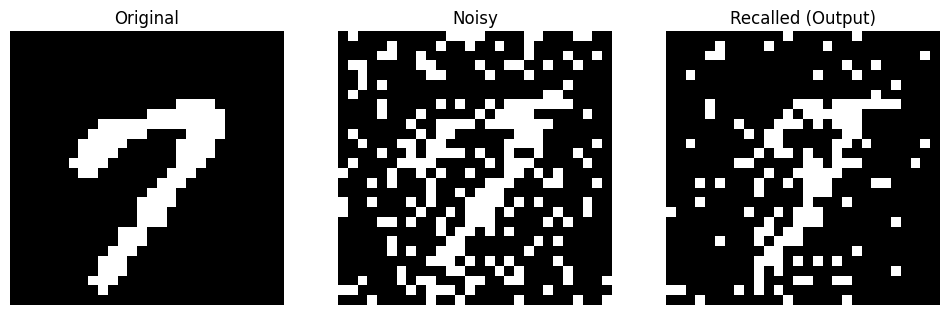

In [ ]:
def run_hopfield(image, patterns, noise_level=0.2, steps=500):
    processed_image = preprocess(image)
    processed_patterns = np.array([preprocess(p) for p in patterns])
    weights = calculate_weights(processed_patterns)
    noisy_image = add_noise(processed_image, noise_level)
    recalled_image = hopfield_recall_async(weights, noisy_image, steps)
    return processed_image, noisy_image, recalled_image


def identify_digit(recalled, patterns, labels):
    similarities = [np.dot(recalled, preprocess(p)) for p in patterns]
    return labels[np.argmax(similarities)]


digit_to_test = 7
original, noisy, recalled = run_hopfield(
    representative_images[digit_to_test],
    representative_images,
    noise_level=0.2,
    steps=600
)


predicted_digit = identify_digit(recalled, representative_images, representative_labels)
print("Predicted digit:", predicted_digit)


plt.figure(figsize=(12, 4))
for i, (img, title) in enumerate(zip(
    [original, noisy, recalled],
    ["Original", "Noisy", "Recalled (Output)"]
)):
    plt.subplot(1, 3, i + 1)
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.title(title)
    plt.axis('off')

plt.show()
